In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_train = pd.read_csv("/home/vamshikiran.nagireddy/Music/0753aae4bec411eb/Train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

### step-1 : exploratory data analysis

array([[<AxesSubplot:title={'center':'EmpID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'LatestDegreeCGPA'}>],
       [<AxesSubplot:title={'center':'YearsOfExperince'}>,
        <AxesSubplot:title={'center':'GraduationYear'}>,
        <AxesSubplot:title={'center':'CurrentCTC'}>],
       [<AxesSubplot:title={'center':'ExpectedCTC'}>,
        <AxesSubplot:title={'center':'EmpScore'}>,
        <AxesSubplot:title={'center':'TotalLeavesTaken'}>],
       [<AxesSubplot:title={'center':'FitmentPercent'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

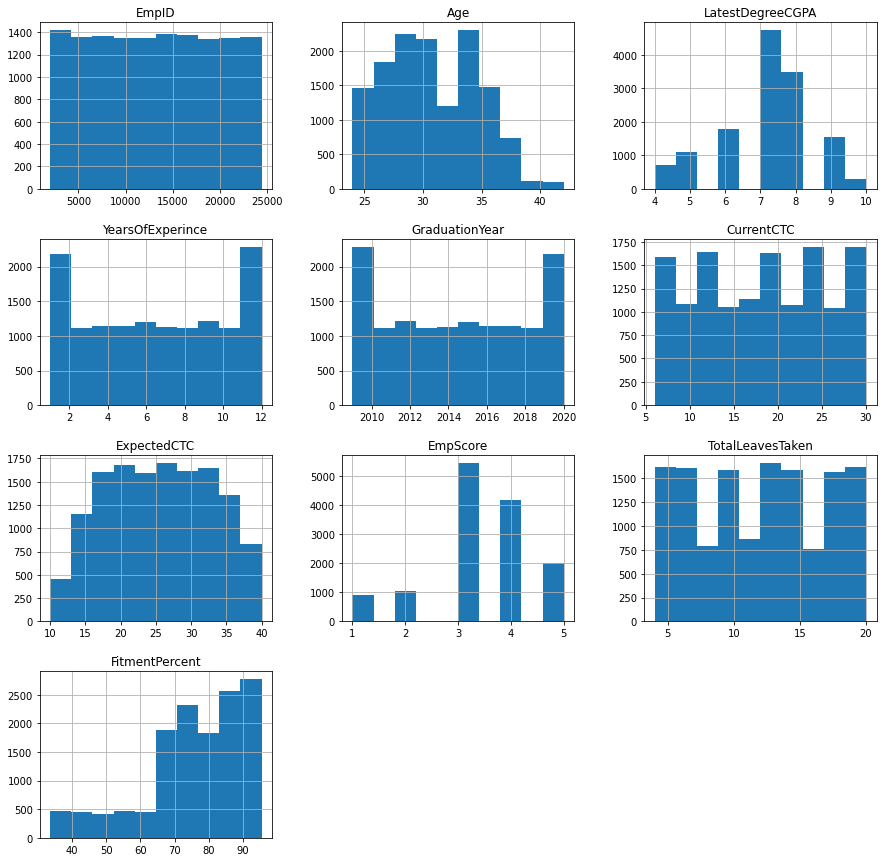

In [4]:
#checking the distribution of numeric features like age, gpa, experience, CTC etc ....
df_train.hist(figsize=(15,15))

<AxesSubplot:>

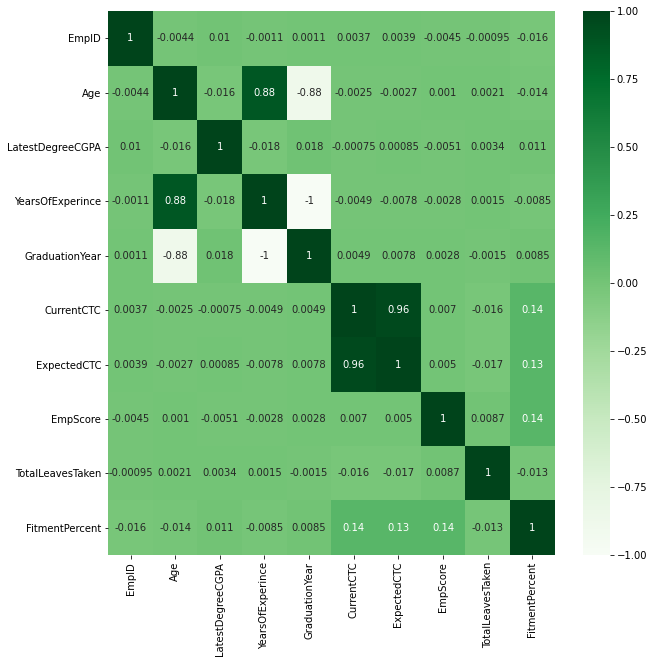

In [5]:
#lets check the relations between given features using seaborn
plt.subplots(figsize=(10,10))
sb.heatmap(df_train.corr(),annot=True,cmap= 'Greens')

[<AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>,
 <AxesSubplot:xlabel='count', ylabel='BiasInfluentialFactor'>]

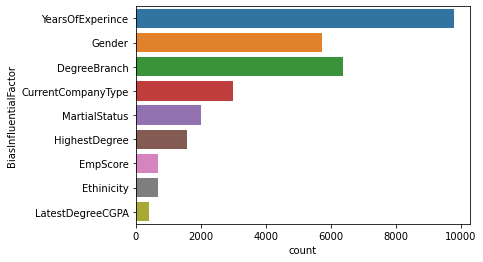

In [6]:
features = list(df_train.dtypes[df_train.dtypes=='object'].index)
features.remove('EmpName')
[sb.countplot(data=df_train, y='{}'.format(feature)) for feature in features]

In [7]:
#checking if we have nan values in any columns
df_train.isna().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [8]:
df_train['BiasInfluentialFactor'] = df_train['BiasInfluentialFactor'].replace(np.nan, "nofactor")
df_train['FitmentNormalized'] = df_train['FitmentPercent'].apply(lambda x:round(x/100,4))

In [9]:
df_train['BiasInfluentialFactor'].value_counts()

nofactor              3336
DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [10]:
#considering above factors it is clear that influential factors for gender inequality are Gender , Ethinicity and martialstatus

In [11]:
target_list = list(df_train['BiasInfluentialFactor'].unique())

In [12]:
target_dict={}
pred_dict={}
for i,t in enumerate(target_list):
    target_dict[t] = i
    pred_dict[i]=t

In [13]:
df_train['target'] = df_train['BiasInfluentialFactor'].apply(lambda x:target_dict[x])

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [15]:
x_train = df_train[['EmpID', 'EmpName','LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_train = x_train.to_numpy()
cats=[]
for x in x_train:
    for c,e in zip(df_train.columns,x):
        if type(e) == str:
            cats.append(c)
    break
    
df_train_c = df_train.copy()
for c in cats:
    df_train_c[c] =df_train_c[c].astype('category').cat.codes
x_train = df_train_c[['LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_train = x_train.to_numpy()

y_train = df_train[['target']]
y_train = y_train.to_numpy()

In [16]:
x_train[0]

array([   0,   35,    1,    3,    0,    2,    0,    7,   12, 2009,   21,
         26,    0,    5,    7,    0,    1,   20])

In [17]:
dtree_model_factor = DecisionTreeClassifier(max_depth = 17).fit(x_train, y_train)

In [18]:
preds = dtree_model_factor.predict(x_train)

In [19]:
confusion_matrix(y_train.tolist(),preds.tolist())

array([[1551,   10,    0,    0,    0,    0,    0,    0,    0,    0],
       [  15, 3112,   81,   53,   28,   20,    5,   15,    7,    0],
       [   0,    3, 2595,    0,    7,    0,    0,    0,    0,    0],
       [   0,   33,    0, 2817,    8,    0,    0,    0,    0,    0],
       [   7,   95,   21,    4, 1047,    0,    0,    0,    0,    0],
       [   0,   11,    0,    0,    0,  263,    0,    0,    5,    1],
       [   0,    1,    0,    0,    0,    0,  581,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,  653,    5,    0],
       [   0,   13,    0,    0,    0,   28,    0,   43,  243,    1],
       [   0,    0,    0,    0,    1,    3,    0,    1,    0,  257]])

In [20]:
import sklearn
sklearn.metrics.accuracy_score(y_train.tolist(),preds.tolist())

0.9614510809820447

In [21]:
x_train = df_train[['EmpID', 'EmpName','LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_train = x_train.to_numpy()
cats=[]
for x in x_train:
    for c,e in zip(df_train.columns,x):
        if type(e) == str:
            cats.append(c)
    break
    
df_train_c = df_train.copy()
for c in cats:
    df_train_c[c] =df_train_c[c].astype('category').cat.codes
    
x_train = df_train_c[['LanguageOfCommunication', 'Age',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_train = x_train.to_numpy()

y_train = df_train[['FitmentNormalized']]
y_train = y_train.to_numpy()

In [22]:
#fitment percentage prediction

In [23]:
from sklearn.tree import DecisionTreeRegressor 
fitment_model_regressor = DecisionTreeRegressor(random_state = 0) 
fitment_model_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
fitment_model_regressor.predict(x_train[45].reshape(1, -1))

array([0.8677])

### step2 :- testing

In [25]:
df_test = pd.read_csv("/home/vamshikiran.nagireddy/Music/0753aae4bec411eb/Test.csv")

In [26]:
x_test = df_test[['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_test = x_test.to_numpy()

cats=[]
for x in x_test:
    for c,e in zip(df_test.columns,x):
        if not (type(e)==int or type(e)==float):
            #print(c)
            cats.append(c)
    break

df_test_c = df_test.copy()
for c in cats:
    df_test_c[c] =df_test_c[c].astype('category').cat.codes
    
x_test = df_test_c[['LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_test_bias = x_test.to_numpy()

In [27]:
x_test = df_test[['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_test = x_test.to_numpy()

cats=[]
for x in x_test:
    for c,e in zip(df_test.columns,x):
        if not (type(e)==int or type(e)==float):
            #print(c)
            cats.append(c)
    break

df_test_c = df_test.copy()
for c in cats:
    df_test_c[c] =df_test_c[c].astype('category').cat.codes
    
x_test = df_test_c[['LanguageOfCommunication', 'Age',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']]
x_test_fitment = x_test.to_numpy()

In [28]:
df_test.loc[0]

EmpID                                        5664
EmpName                                      Theo
LanguageOfCommunication                    Native
Age                                            35
Gender                                       Male
JobProfileIDApplyingFor                   JR85289
HighestDegree                                 PhD
DegreeBranch               Information Technology
GraduatingInstitute                        Tier 2
LatestDegreeCGPA                                5
YearsOfExperince                                5
GraduationYear                               2016
CurrentCTC                                     27
ExpectedCTC                                    34
MartialStatus                              Single
EmpScore                                        4
CurrentDesignation                            SDE
CurrentCompanyType                     Enterprise
DepartmentInCompany                       Finance
TotalLeavesTaken                               18


In [29]:
len(x_test_fitment)
predictions = []
for i in range(8745):
    id_ = df_test.loc[i][0]
    temp = pred_dict[dtree_model_factor.predict(x_test_bias[i].reshape(1, -1))[0]]
    if temp == "nofactor":
        factor = ""
    else:
        factor = temp
    fitment = fitment_model_regressor.predict(x_test_fitment[i].reshape(1, -1))[0]*100
    predictions.append([id_,factor,fitment])

In [30]:
submission = pd.DataFrame(predictions,columns=["EmpID","BiasInfluentialFactor","FitmentPercent"])
#submission.to_csv("/home/vamshikiran.nagireddy/Music/0753aae4bec411eb/submission.csv")

In [32]:
import pickle

with open('/home/vamshikiran.nagireddy/Music/fitment_model_regressor.pickle', 'wb') as f:
    pickle.dump(fitment_model_regressor,f)
    
with open('/home/vamshikiran.nagireddy/Music/dtree_model_factor.pickle', 'wb') as f:
    pickle.dump(dtree_model_factor,f)